In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import typing as tp

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/scaled_books.csv')

drop_cols = ['Rating', 'Title', 'Author', 'Publisher', 'Language']

x, test_x, y, test_y = train_test_split(df.drop(columns=drop_cols), df['Rating'], train_size=0.7)
train_x, valid_x, train_y, valid_y = train_test_split(x, y, train_size=0.7)

train = [train_x, train_y]
valid = [valid_x, valid_y]
test = [test_x, test_y]

models = {
    'neighbour': lambda p: KNeighborsRegressor(n_neighbors=p),
    'linear': lambda p: LinearRegression(n_jobs=p),
    'ensemble': lambda p: RandomForestRegressor(max_depth=p),
    'tree': lambda p: DecisionTreeRegressor(max_depth=p)
}

def append_error(model, part, errors):
    prediction = model.predict(part[0])
    error = mean_squared_error(part[1], prediction)
    errors.append(error)


def run_params(params: tp.Iterable[int], model_name: str):
    if model_name not in models:
        return
    train_err, valid_err, test_err = [], [], []
    for p in params:
        model = models[model_name](p)
        model.fit(train[0], train[1])
        append_error(model, train, train_err)
        append_error(model, valid, valid_err)
        append_error(model, test, test_err)
    plt.plot(params, train_err, color='g', label='train')
    plt.plot(params, valid_err, color='y', label='valid')
    plt.plot(params, test_err, color='b', label='test')
    plt.legend()
    plt.show()

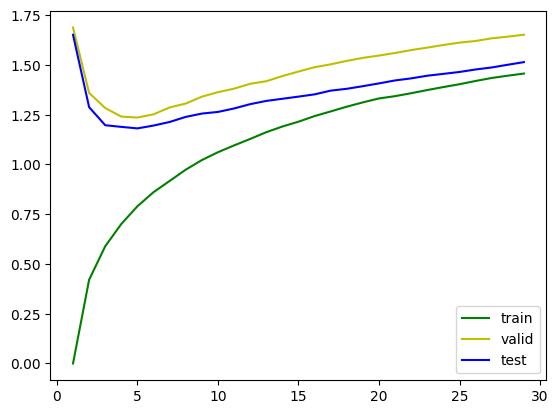

In [8]:
run_params(
    [i for i in range(1, 30)],
    'neighbour'
)

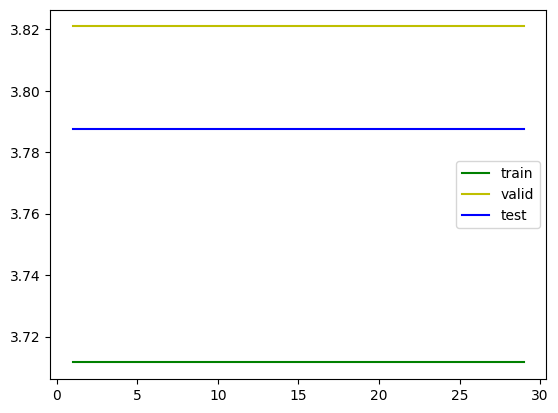

In [14]:
run_params(
    [i for i in range(1, 30)],
    'linear'
)

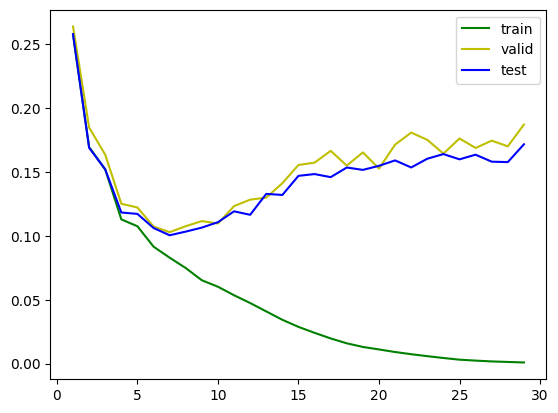

In [15]:
run_params(
    [i for i in range(1, 30)],
    'tree'
)

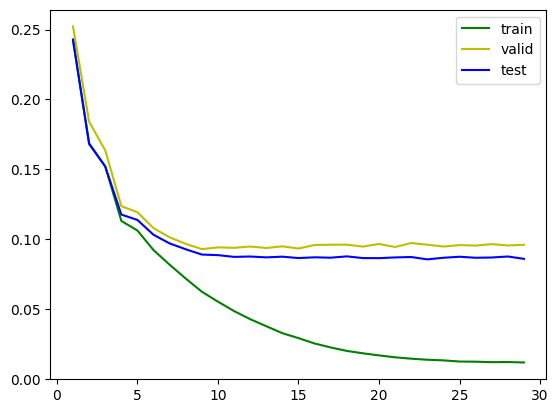

In [17]:
run_params(
    [i for i in range(1, 30)],
    'ensemble'
)